# Analysis of Financial Documents to Forecast Stock Prices

In [ ]:
import numpy as np
import pandas as pd
import csv
import re
import sklearn
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
NB_WORDS = 10000
VAL_SIZE = 1000
NB_START_EPOCHS = 20
BATCH_SIZE = 512

In [ ]:
stock_prediction_data = pd.read_csv('/content/NEWS_YAHOO_stock_prediction.csv')
stock_prediction_data.head()

,Unnamed: 0,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
0,0,AAPL,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
1,1,AAPL,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2,2,AAPL,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
3,3,AAPL,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
4,4,AAPL,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0


In [ ]:
stock_prediction_data.shape

(15975, 13)

### Data sample from first row

In [ ]:
stock_prediction_data.iloc[0]

Unnamed: 0                                                    0
ticker                                                     AAPL
Date                                                 2020-01-27
category                                                opinion
title         Apple Set To Beat Q1 Earnings Estimates  Tech ...
content       Technology giant Apple   NASDAQ AAPL   is set ...
Open                                                  77.514999
High                                                  77.942497
Low                                                   76.220001
Close                                                 77.237503
Adj Close                                             75.793358
Volume                                                161940000
label                                                         0
Name: 0, dtype: object

In [ ]:
stock_prediction_data.iloc[0]['content']

'Technology giant Apple   NASDAQ AAPL   is set to release first quarter fiscal 2020 results on Jan 28 after market close  Since Apple accounts for more than 19  of total market capitalization of the entire technology sector in the S P 500 Index  it is worth taking a look at its fundamentals ahead of its quarterly results Apple has been hitting record highs lately  It has returned about 28  over the past three months  on par with the industry s gain  The momentum is expected to continue if the company beats estimates in the soon to be reported quarter  read    Inside Our MethodologyApple has a Zacks Rank  2  Buy  and an  of  4 08   According to our methodology  the combination of a positive Earnings ESP and a Zacks Rank  1  Strong Buy   2  Buy  or 3  Hold  increases the chances of an earnings beat  You can uncover the best stocks to buy or sell before they re reported with our  Apple saw positive earnings estimate revision of a couple of cents over the past 30 days for the fiscal first 

Instead of just truncating the data size, we will filter out the opinion articles to see if there is a significant change in accuracy.

<Axes: xlabel='category', ylabel='count'>

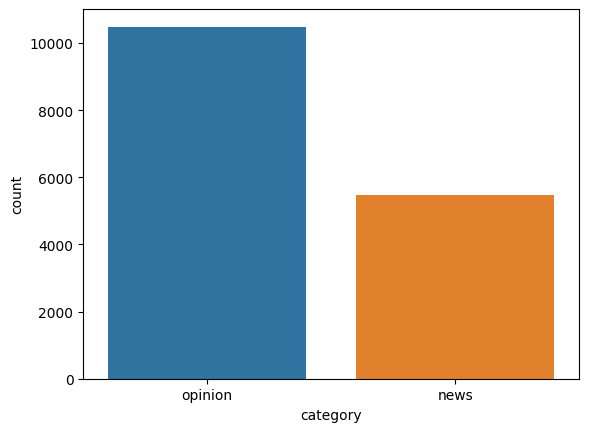

In [ ]:
seaborn.countplot(x='category', data=stock_prediction_data)

In [ ]:
#the dataset has approximately 15000 training examples; truncate the dataset to speed up training
#stock_prediction_data = stock_prediction_data[:5000]
stock_prediction_data = stock_prediction_data[stock_prediction_data["category"] == "news"]
stock_prediction_data.shape
#we now have just news articles, let's see the effect on test accuracy

(5488, 13)

<Axes: xlabel='label', ylabel='count'>

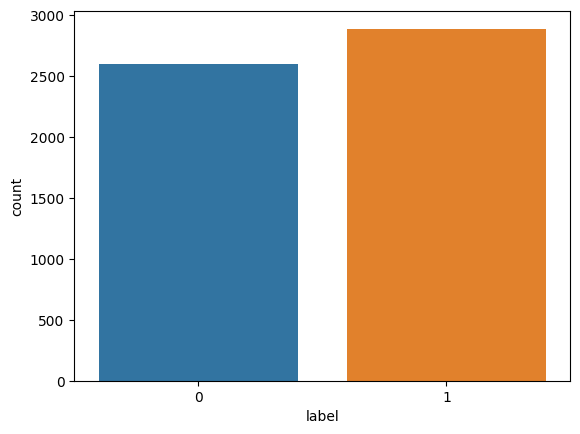

In [ ]:
seaborn.countplot(x='label', data=stock_prediction_data)

# Data Manipulation for Initial sklearn Models

In [ ]:
X = stock_prediction_data['content']
Y = stock_prediction_data['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
#X_test = vectorizer.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)

(4390, 36032)
(1098, 36032)


# Simple Model Evaluation on Dataset



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
nb = MultinomialNB()
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=5000)
svm = SVC()
models = {
    "Naive Bayes": nb,
    "Random Forest": rf,
    "Logistic Regression": lr,
    "Support Vector Machine": svm,
}

In [ ]:
def test_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [ ]:
accuracies = []
for key, model in models.items():
  model_acc = test_model(model, X_train, Y_train, X_test, Y_test)
  accuracies.append(model_acc)
model_performances = pd.DataFrame({'Model':models.keys(), "Accuracy":accuracies})

In [ ]:
model_performances

,Model,Accuracy
0,Naive Bayes,0.569217
1,Random Forest,0.571038
2,Logistic Regression,0.556466
3,Support Vector Machine,0.573770
